<a href="https://colab.research.google.com/github/somosnlp/llm-arena/blob/main/An%C3%A1lisis_general_arena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución de prompts por país, longitud media del prompt, respuestas chosen y rejected por país y similitud y divergengia entre respuestas chosen y rejected

/tmp/ipython-input-2-3347518896.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="country", order=df["country"].value_counts().index, palette="Set2")


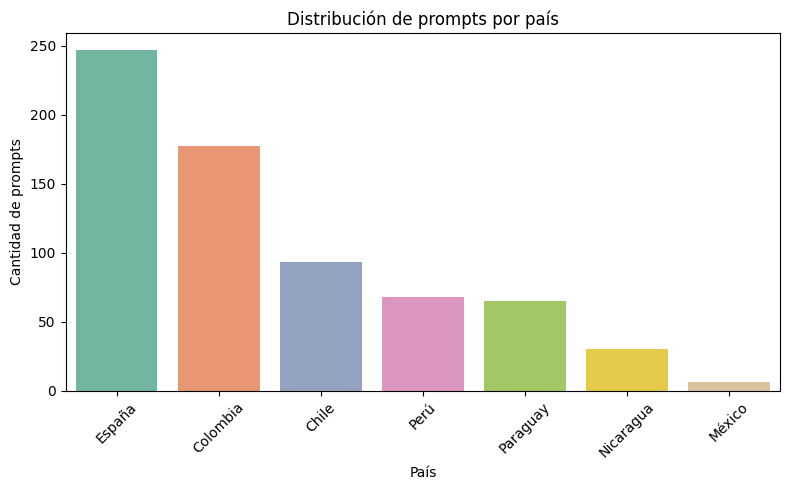

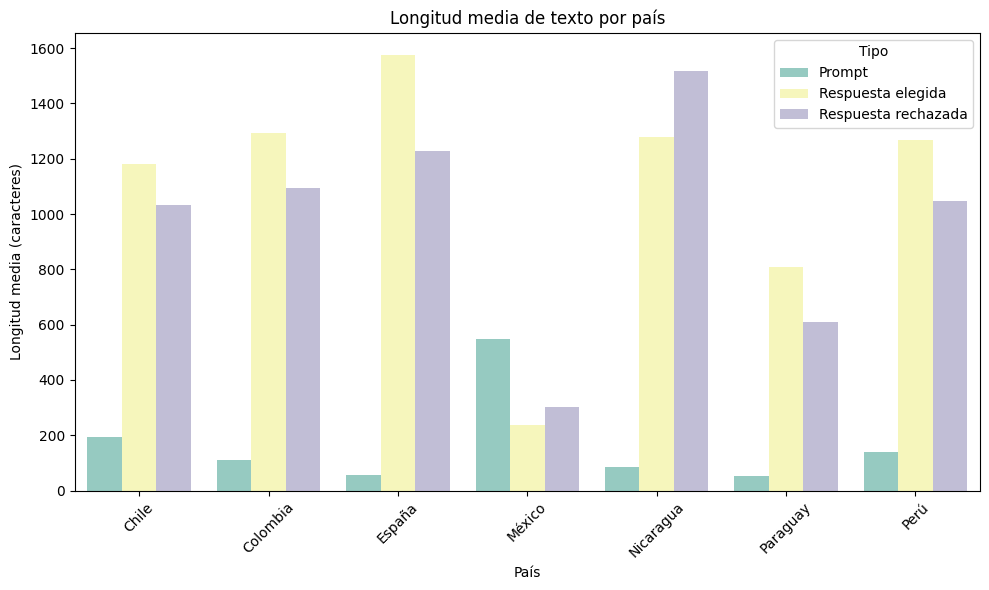

/tmp/ipython-input-2-3347518896.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="country", y="similarity", palette="Set1")


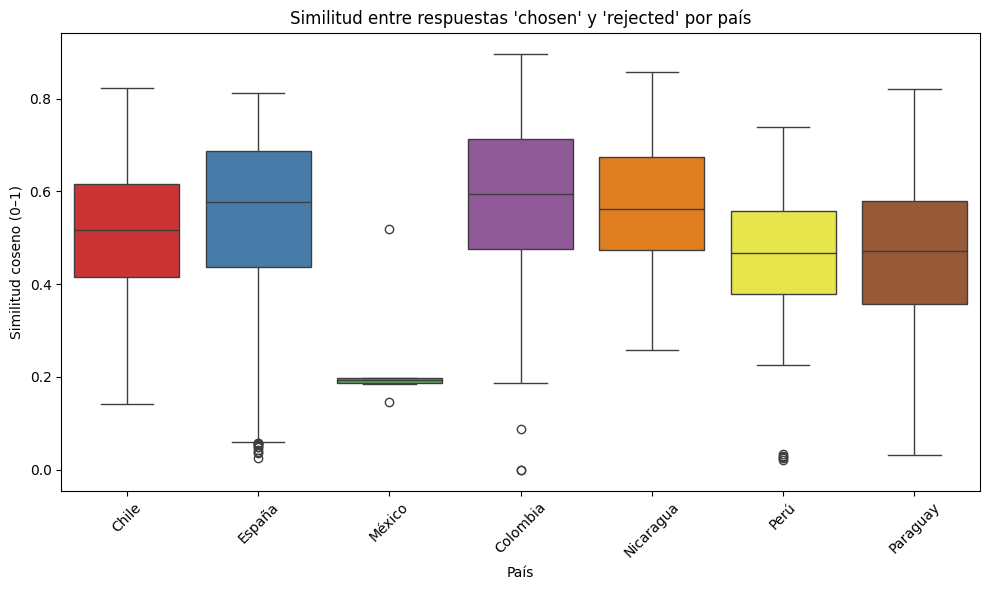


✅ Todos los gráficos han sido guardados en: /content/figures


In [2]:
# 📦 Instalar dependencias si es necesario
!pip install matplotlib seaborn scikit-learn

# 📚 Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os

# 📂 Crear carpeta para gráficos
output_folder = "/content/figures"
os.makedirs(output_folder, exist_ok=True)

# 📁 Cargar CSV (modifica la ruta si lo subes manualmente en Colab)
file_path = "/content/dataset_preferencias_dpo_v0.csv"
df = pd.read_csv(file_path)

# 🎯 1. Distribución de prompts por país
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="country", order=df["country"].value_counts().index, palette="Set2")
plt.title("Distribución de prompts por país")
plt.xlabel("País")
plt.ylabel("Cantidad de prompts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{output_folder}/distribucion_prompts_por_pais.png")
plt.show()

# ✍️ 2. Longitud media de textos por país
df["question_len"] = df["question"].str.len()
df["chosen_len"] = df["chosen"].str.len()
df["rejected_len"] = df["rejected"].str.len()

lengths = df.groupby("country")[["question_len", "chosen_len", "rejected_len"]].mean().reset_index()
lengths_melted = lengths.melt(id_vars="country", var_name="Tipo", value_name="Longitud media")
lengths_melted["Tipo"] = lengths_melted["Tipo"].map({
    "question_len": "Prompt",
    "chosen_len": "Respuesta elegida",
    "rejected_len": "Respuesta rechazada"
})

plt.figure(figsize=(10, 6))
sns.barplot(data=lengths_melted, x="country", y="Longitud media", hue="Tipo", palette="Set3")
plt.title("Longitud media de texto por país")
plt.xlabel("País")
plt.ylabel("Longitud media (caracteres)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{output_folder}/longitud_media_por_pais.png")
plt.show()

# 🔁 3. Similitud entre 'chosen' y 'rejected'
def calcular_similitud(texto1, texto2):
    try:
        tfidf = TfidfVectorizer()
        tfidf_matrix = tfidf.fit_transform([str(texto1), str(texto2)])
        return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
    except:
        return None

df["similarity"] = df.apply(lambda row: calcular_similitud(row["chosen"], row["rejected"]), axis=1)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="country", y="similarity", palette="Set1")
plt.title("Similitud entre respuestas 'chosen' y 'rejected' por país")
plt.xlabel("País")
plt.ylabel("Similitud coseno (0–1)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{output_folder}/similitud_chosen_rejected_por_pais.png")
plt.show()

print(f"\n✅ Todos los gráficos han sido guardados en: {output_folder}")


In [3]:
!pip install pandas matplotlib seaborn scikit-learn nltk spacy sentence-transformers wordcloud textblob
!python -m nltk.downloader punkt stopwords
!python -m textblob.download_corpora
!python -m spacy download es_core_news_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 881.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [1]:
import pandas as pd
df = pd.read_csv("/content/dataset_preferencias_dpo_v0.csv")  # cambia si usas otro nombre


# 4. Análisis de temas (topic modeling) y clustering por país

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

# Crear carpeta de salida
import os
os.makedirs("/content/figures", exist_ok=True)

# Filtrar textos y agrupar por país
texts_by_country = df.groupby("country")["question"].apply(lambda x: " ".join(x)).to_dict()

# TF-IDF y modelado por país
n_topics = 5
for country, text in texts_by_country.items():
    tfidf = TfidfVectorizer(stop_words='spanish', max_features=1000)
    tfidf_matrix = tfidf.fit_transform([text])
    nmf = NMF(n_components=n_topics, random_state=42)
    W = nmf.fit_transform(tfidf_matrix)
    H = nmf.components_
    vocab = tfidf.get_feature_names_out()

    print(f"\n🔍 Tópicos más frecuentes en {country.upper()}:")
    for topic_idx, topic in enumerate(H):
        terms = [vocab[i] for i in topic.argsort()[-8:][::-1]]
        print(f" - Tópico {topic_idx + 1}: {', '.join(terms)}")


InvalidParameterError: The 'stop_words' parameter of TfidfVectorizer must be a str among {'english'}, an instance of 'list' or None. Got 'spanish' instead.

# 5. Análisis de sentimiento por país y tipo (chosen vs rejected)

In [ ]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

def obtener_polaridad(texto):
    try:
        return TextBlob(str(texto)).translate(to='en').sentiment.polarity
    except:
        return None

df["chosen_sentiment"] = df["chosen"].apply(obtener_polaridad)
df["rejected_sentiment"] = df["rejected"].apply(obtener_polaridad)

# Dataset para visualización
df_melted = df.melt(id_vars="country", value_vars=["chosen_sentiment", "rejected_sentiment"],
                    var_name="Tipo", value_name="Sentimiento")
df_melted["Tipo"] = df_melted["Tipo"].map({
    "chosen_sentiment": "Elegida",
    "rejected_sentiment": "Rechazada"
})

plt.figure(figsize=(10,6))
sns.boxplot(data=df_melted, x="country", y="Sentimiento", hue="Tipo", palette="Set2")
plt.title("Distribución del sentimiento por país y tipo de respuesta")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/content/figures/sentimiento_por_pais_tipo.png")
plt.show()


# 6. Frecuencia de palabras y expresiones locales por país

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import seaborn as sns

stop_words = set(stopwords.words('spanish'))

def contar_palabras(textos):
    tokens = nltk.word_tokenize(" ".join(textos).lower())
    palabras = [t for t in tokens if t.isalpha() and t not in stop_words]
    return Counter(palabras)

frecuencias = {}
for pais in df["country"].unique():
    subset = df[df["country"] == pais]["chosen"]
    frecuencias[pais] = contar_palabras(subset)

# Mostrar top 10 por país
for pais, counter in frecuencias.items():
    top_words = counter.most_common(10)
    print(f"\n🔠 {pais.upper()}:")
    for word, freq in top_words:
        print(f"{word}: {freq}")


# 7. Análisis de estilo narrativo, modismos, y formalidad entre chosen y rejected

In [ ]:
import spacy
nlp = spacy.load("es_core_news_sm")

def extraer_estilo(texto):
    doc = nlp(str(texto))
    tokens = [token.text.lower() for token in doc]
    has_weon = "weón" in tokens or "weon" in tokens
    tiene_tú = "tú" in tokens
    primera_persona = any(token.tag_ == "PRON" and token.text.lower() in ["yo", "nosotros"] for token in doc)
    imperativos = sum(1 for token in doc if token.tag_ == "VERB" and token.morph.get("Mood") == ["Imp"])
    return pd.Series({
        "modismo": has_weon,
        "segunda_persona": tiene_tú,
        "primera_persona": primera_persona,
        "imperativos": imperativos
    })

df_chosen = df["chosen"].apply(extraer_estilo).add_prefix("chosen_")
df_rejected = df["rejected"].apply(extraer_estilo).add_prefix("rejected_")

df_estilo = pd.concat([df[["country"]], df_chosen, df_rejected], axis=1)

# Comparar uso de imperativos en chosen vs rejected
df_plot = df_estilo[["country", "chosen_imperativos", "rejected_imperativos"]].melt(
    id_vars="country", var_name="Tipo", value_name="Cantidad")
df_plot["Tipo"] = df_plot["Tipo"].map({
    "chosen_imperativos": "Elegida",
    "rejected_imperativos": "Rechazada"
})

plt.figure(figsize=(10,6))
sns.barplot(data=df_plot, x="country", y="Cantidad", hue="Tipo", palette="coolwarm")
plt.title("Uso de imperativos por país y tipo de respuesta")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/content/figures/imperativos_por_pais.png")
plt.show()
